In [6]:
import pandas as pd
import numpy as np
from sklearn.svm import OneClassSVM
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

df = pd.read_csv('../data/PEMS07/PEMS07.csv')

In [7]:
svm = OneClassSVM(kernel='rbf', gamma='scale', nu=0.01)

svm.fit(df[['cost']])

df['Anomaly'] = svm.predict(df[['cost']])
df['Anomaly'] = df['Anomaly'].map({1: 0, -1: 1})  

print(df)

     from   to   cost  Anomaly
0     721  445  0.790        0
1     542  480  2.575        0
2     770  702  0.926        0
3      32  266  0.596        0
4      34   56  0.628        0
..    ...  ...    ...      ...
861   591  600  8.862        0
862   374   40  1.471        0
863   477  498  1.596        0
864   710  843  0.785        0
865   396  352  6.296        1

[866 rows x 4 columns]


In [8]:
print("Anomalous data:")
anomalies = df[df['Anomaly'] == 1]
print(anomalies[['from', 'to', 'cost']])

Anomalous data:
     from   to    cost
44    585   36  14.353
51    223  499   8.095
433   814  344   4.592
445    49  246   4.502
500   876  535   4.595
573    31  347   0.032
619   264  396  20.539
670   621  515   6.499
680   139    1   4.561
729   211  433   4.614
784   330   39  14.042
820   256  199   4.669
847   575  376   4.843
860   663  789  17.238
865   396  352   6.296


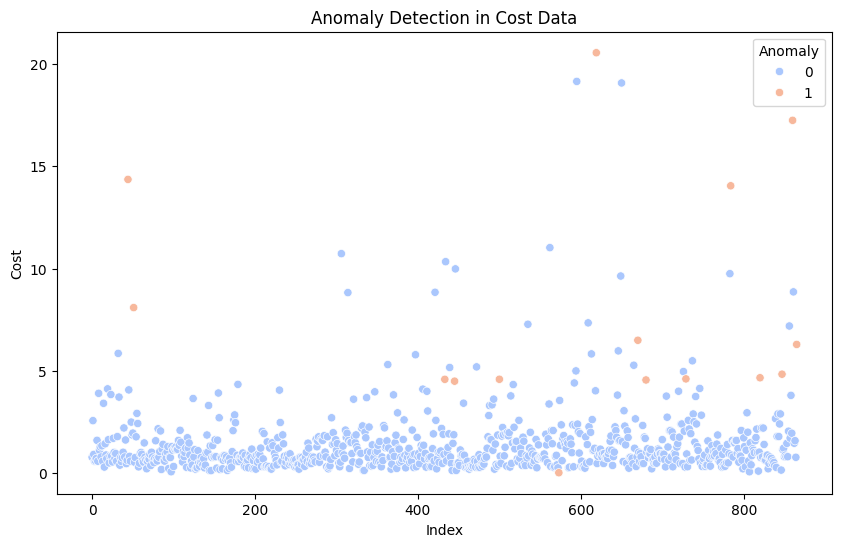

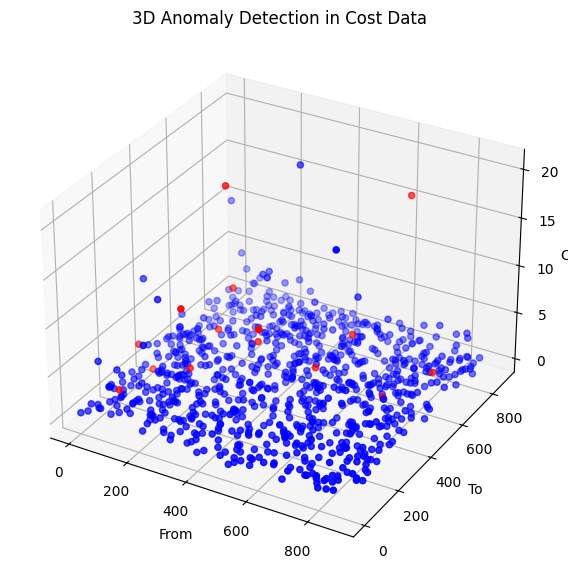

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x=df.index, y='cost', hue='Anomaly', palette='coolwarm', marker='o')
plt.xlabel('Index')
plt.ylabel('Cost')
plt.title('Anomaly Detection in Cost Data')
plt.show()

# Add a synthetic feature for demonstration
np.random.seed(42)
df['feature_2'] = np.random.normal(size=len(df))

# 3D plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
colors = df['Anomaly'].apply(lambda x: 'red' if x == 1 else 'blue')
sc = ax.scatter(df['from'], df['to'], df['cost'], c=colors, marker='o')

ax.set_xlabel('From')
ax.set_ylabel('To')
ax.set_zlabel('Cost')
ax.set_title('3D Anomaly Detection in Cost Data')

plt.show()

In [10]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(df[['cost']], df['Anomaly'])
print(f'Silhouette Score: {silhouette_avg:.2f}')

Silhouette Score: 0.80
